In [1]:
from sklearn.datasets import *
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [2]:
l_data = load_breast_cancer()
l_data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
l_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
data = pd.DataFrame(l_data.data,columns = l_data.feature_names)
sy = pd.Series(l_data.target, dtype = 'category')
sy = sy.cat.rename_categories(l_data.target_names)
data['Y'] =sy
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [5]:
#for i in l_data.feature_names:
#    sns.pairplot(vars = [i], data=data, hue = 'Y')

In [6]:
X_data = data[['worst concave points','worst area','worst radius','worst perimeter']].values
X_data

array([[2.654e-01, 2.019e+03, 2.538e+01, 1.846e+02],
       [1.860e-01, 1.956e+03, 2.499e+01, 1.588e+02],
       [2.430e-01, 1.709e+03, 2.357e+01, 1.525e+02],
       ...,
       [1.418e-01, 1.124e+03, 1.898e+01, 1.267e+02],
       [2.650e-01, 1.821e+03, 2.574e+01, 1.846e+02],
       [0.000e+00, 2.686e+02, 9.456e+00, 5.916e+01]])

In [7]:
Y_data = data['Y'].replace(['malignant', 'benign'],[1,0]).values
Y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [8]:
X_data.shape,Y_data.shape

((569, 4), (569,))

In [9]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,random_state=1)
t_x.shape

(426, 4)

In [10]:
m = Sequential()
m.add(Dense(1, input_dim = 4,activation = 'sigmoid'))
m.compile(optimizer='adam',loss = 'binary_crossentropy'
          ,metrics=['binary_accuracy'])
hy = m.fit(t_x,t_y,epochs=200,validation_data=(tt_x,tt_y))

Epoch 1/200
14/14 [==============================] - 1s 13ms/step - loss: 344.6053 - binary_accuracy: 0.3685 - val_loss: 348.0934 - val_binary_accuracy: 0.3846
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 338.9410 - binary_accuracy: 0.3685 - val_loss: 342.3058 - val_binary_accuracy: 0.3846
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 333.2155 - binary_accuracy: 0.3685 - val_loss: 336.4879 - val_binary_accuracy: 0.3846
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 327.3802 - binary_accuracy: 0.3685 - val_loss: 330.7212 - val_binary_accuracy: 0.3846
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 321.8275 - binary_accuracy: 0.3685 - val_loss: 324.8310 - val_binary_accuracy: 0.3846
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 316.0828 - binary_accuracy: 0.3685 - val_loss: 319.0562 - val_binary_accuracy: 0.3846
Epoch 7/200
14/14 [==========================

14/14 [==============================] - 0s 2ms/step - loss: 53.4350 - binary_accuracy: 0.3685 - val_loss: 51.7803 - val_binary_accuracy: 0.3846
Epoch 53/200
14/14 [==============================] - 0s 3ms/step - loss: 47.7847 - binary_accuracy: 0.3685 - val_loss: 46.0295 - val_binary_accuracy: 0.3846
Epoch 54/200
14/14 [==============================] - 0s 3ms/step - loss: 42.0881 - binary_accuracy: 0.3685 - val_loss: 40.2263 - val_binary_accuracy: 0.3846
Epoch 55/200
14/14 [==============================] - 0s 3ms/step - loss: 36.4361 - binary_accuracy: 0.3685 - val_loss: 34.5021 - val_binary_accuracy: 0.3846
Epoch 56/200
14/14 [==============================] - 0s 3ms/step - loss: 30.8601 - binary_accuracy: 0.3685 - val_loss: 28.7639 - val_binary_accuracy: 0.3846
Epoch 57/200
14/14 [==============================] - 0s 3ms/step - loss: 25.2259 - binary_accuracy: 0.3685 - val_loss: 22.9621 - val_binary_accuracy: 0.3846
Epoch 58/200
14/14 [==============================] - 0s 3ms/step

14/14 [==============================] - 0s 3ms/step - loss: 0.3581 - binary_accuracy: 0.9061 - val_loss: 0.4577 - val_binary_accuracy: 0.8392
Epoch 105/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3561 - binary_accuracy: 0.9085 - val_loss: 0.4500 - val_binary_accuracy: 0.8462
Epoch 106/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3555 - binary_accuracy: 0.9085 - val_loss: 0.4431 - val_binary_accuracy: 0.8531
Epoch 107/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3558 - binary_accuracy: 0.9061 - val_loss: 0.4411 - val_binary_accuracy: 0.8671
Epoch 108/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3562 - binary_accuracy: 0.9014 - val_loss: 0.4477 - val_binary_accuracy: 0.8462
Epoch 109/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3540 - binary_accuracy: 0.9038 - val_loss: 0.4426 - val_binary_accuracy: 0.8531
Epoch 110/200
14/14 [==============================] - 0s 3ms/step - los

14/14 [==============================] - 0s 3ms/step - loss: 0.3457 - binary_accuracy: 0.9085 - val_loss: 0.4356 - val_binary_accuracy: 0.8531
Epoch 157/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3456 - binary_accuracy: 0.9061 - val_loss: 0.4292 - val_binary_accuracy: 0.8671
Epoch 158/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3475 - binary_accuracy: 0.9061 - val_loss: 0.4287 - val_binary_accuracy: 0.8671
Epoch 159/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3457 - binary_accuracy: 0.9085 - val_loss: 0.4439 - val_binary_accuracy: 0.8392
Epoch 160/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3470 - binary_accuracy: 0.9108 - val_loss: 0.4321 - val_binary_accuracy: 0.8531
Epoch 161/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3437 - binary_accuracy: 0.9061 - val_loss: 0.4335 - val_binary_accuracy: 0.8531
Epoch 162/200
14/14 [==============================] - 0s 3ms/step - los

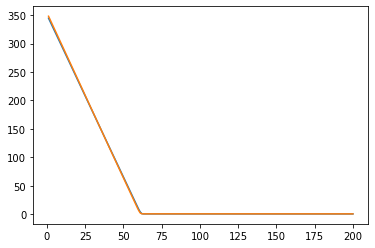

In [11]:
ec = range(1,len(hy.history['binary_accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])